In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import pickle

In [26]:
df = pd.read_csv("clean_data.csv")

In [27]:
df.shape


(541, 7)

In [28]:
X = df.drop(columns=["PCOS (Y/N)"])
X.head()

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,3,3,0,0,0,2
1,5,3,0,0,0,2
2,15,13,0,0,0,2
3,2,2,0,0,0,2
4,4,3,0,0,0,2


In [29]:
y = df["PCOS (Y/N)"].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=13)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
print(f"Score in Train Data : {lr.score(X_train,y_train)}")

Score in Train Data : 0.9033149171270718


In [33]:
y_pred=lr.predict(X_test)

In [34]:
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 90.5027932960894


In [35]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       118
           1       0.83      0.90      0.87        61

    accuracy                           0.91       179
   macro avg       0.89      0.90      0.90       179
weighted avg       0.91      0.91      0.91       179



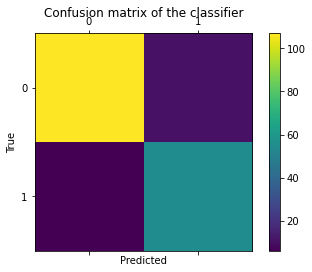

In [36]:
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure() 

ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)
specificity = tn / (tn+fp)
print(specificity)

True Negatives:  107
False Positives:  11
False Negatives:  6
True Positives:  55
0.9067796610169492


In [38]:
sensitivity=tp/(fn+tp)
print(sensitivity)

0.9016393442622951
